In [1]:
import findspark
import os
import sys
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [2]:
findspark.init()

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark import SparkFiles
import numpy as np

In [4]:
spark = SparkSession.builder.appName("Project").config("spark.mongodb.input.uri","mongodb://localhost:27017/Project.spotify?readPreference=primaryPreferred").config("spark.mongodb.output.uri","mongodb://localhost:27017/Project.spotify").config("spark.jars.packages","org.mongodb.spark:mongo-spark-connector_2.12:3.0.0").getOrCreate()


Py4JJavaError: An error occurred while calling None.org.apache.spark.api.java.JavaSparkContext.
: java.lang.RuntimeException: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.getWinUtilsPath(Shell.java:735)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:270)
	at org.apache.hadoop.fs.FileUtil.chmod(FileUtil.java:1108)
	at org.apache.hadoop.fs.FileUtil.chmod(FileUtil.java:1094)
	at org.apache.spark.util.Utils$.fetchFile(Utils.scala:579)
	at org.apache.spark.SparkContext.addFile(SparkContext.scala:1647)
	at org.apache.spark.SparkContext.$anonfun$new$13(SparkContext.scala:514)
	at org.apache.spark.SparkContext.$anonfun$new$13$adapted(SparkContext.scala:514)
	at scala.collection.immutable.List.foreach(List.scala:431)
	at org.apache.spark.SparkContext.<init>(SparkContext.scala:514)
	at org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
	at java.lang.reflect.Constructor.newInstance(Constructor.java:423)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:238)
	at py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
	at py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:745)
Caused by: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.fileNotFoundException(Shell.java:547)
	at org.apache.hadoop.util.Shell.getHadoopHomeDir(Shell.java:568)
	at org.apache.hadoop.util.Shell.getQualifiedBin(Shell.java:591)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:688)
	at org.apache.hadoop.util.StringUtils.<clinit>(StringUtils.java:79)
	at org.apache.hadoop.conf.Configuration.getTimeDurationHelper(Configuration.java:1907)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1867)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1840)
	at org.apache.hadoop.util.ShutdownHookManager.getShutdownTimeout(ShutdownHookManager.java:183)
	at org.apache.hadoop.util.ShutdownHookManager$HookEntry.<init>(ShutdownHookManager.java:207)
	at org.apache.hadoop.util.ShutdownHookManager.addShutdownHook(ShutdownHookManager.java:304)
	at org.apache.spark.util.SparkShutdownHookManager.install(ShutdownHookManager.scala:181)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks$lzycompute(ShutdownHookManager.scala:50)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks(ShutdownHookManager.scala:48)
	at org.apache.spark.util.ShutdownHookManager$.addShutdownHook(ShutdownHookManager.scala:153)
	at org.apache.spark.util.ShutdownHookManager$.<init>(ShutdownHookManager.scala:58)
	at org.apache.spark.util.ShutdownHookManager$.<clinit>(ShutdownHookManager.scala)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:343)
	at org.apache.spark.deploy.SparkSubmit.prepareSubmitEnvironment(SparkSubmit.scala:344)
	at org.apache.spark.deploy.SparkSubmit.org$apache$spark$deploy$SparkSubmit$$runMain(SparkSubmit.scala:901)
	at org.apache.spark.deploy.SparkSubmit.doRunMain$1(SparkSubmit.scala:180)
	at org.apache.spark.deploy.SparkSubmit.submit(SparkSubmit.scala:203)
	at org.apache.spark.deploy.SparkSubmit.doSubmit(SparkSubmit.scala:90)
	at org.apache.spark.deploy.SparkSubmit$$anon$2.doSubmit(SparkSubmit.scala:1046)
	at org.apache.spark.deploy.SparkSubmit$.main(SparkSubmit.scala:1055)
	at org.apache.spark.deploy.SparkSubmit.main(SparkSubmit.scala)
Caused by: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset.
	at org.apache.hadoop.util.Shell.checkHadoopHomeInner(Shell.java:467)
	at org.apache.hadoop.util.Shell.checkHadoopHome(Shell.java:438)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:515)
	... 22 more


In [5]:
url="https://github.com/spags093/spotify_song_data/raw/main/spotify_song_data.csv"
spark.sparkContext.addFile(url)
df=spark.read.csv(SparkFiles.get("spotify_song_data.csv"),header=True,inferSchema=True)
df.show(5)

+------------+--------------------+------------------+-----------+-------------------+--------+--------------------+------------------+---+--------+-------------------+----+--------------------+----------+------------+-----------+------------------+------------------+----+
|acousticness|             artists|      danceability|duration_ms|             energy|explicit|                  id|  instrumentalness|key|liveness|           loudness|mode|                name|popularity|release_date|speechiness|             tempo|           valence|year|
+------------+--------------------+------------------+-----------+-------------------+--------+--------------------+------------------+---+--------+-------------------+----+--------------------+----------+------------+-----------+------------------+------------------+----+
|       0.991|     ['Mamie Smith']|             0.598|     168333|0.22399999999999998|       0|0cS0A1fUEUd1EW3Fc...|          0.000522|  5|   0.379|            -12.628|   0|Keep 

In [6]:
df.createOrReplaceTempView("View")

In [7]:
df=spark.sql("select * from View where regexp_like(danceability,'[0-9]')")


In [8]:
df1=df.withColumn("artists",regexp_replace('artists', "[^0-9a-zA-Z_\-]+", " "))


In [9]:
df1.show()

+--------------------+--------------------+-------------------+-----------+-------------------+--------+--------------------+-------------------+---+-------------------+-------------------+----+--------------------+----------+------------+--------------------+------------------+-------------------+----+
|        acousticness|             artists|       danceability|duration_ms|             energy|explicit|                  id|   instrumentalness|key|           liveness|           loudness|mode|                name|popularity|release_date|         speechiness|             tempo|            valence|year|
+--------------------+--------------------+-------------------+-----------+-------------------+--------+--------------------+-------------------+---+-------------------+-------------------+----+--------------------+----------+------------+--------------------+------------------+-------------------+----+
|               0.991|        Mamie Smith |              0.598|     168333|0.22399999

In [10]:
df1=df1.drop('id','release_date')
print(df1.show())

+--------------------+--------------------+-------------------+-----------+-------------------+--------+-------------------+---+-------------------+-------------------+----+--------------------+----------+--------------------+------------------+-------------------+----+
|        acousticness|             artists|       danceability|duration_ms|             energy|explicit|   instrumentalness|key|           liveness|           loudness|mode|                name|popularity|         speechiness|             tempo|            valence|year|
+--------------------+--------------------+-------------------+-----------+-------------------+--------+-------------------+---+-------------------+-------------------+----+--------------------+----------+--------------------+------------------+-------------------+----+
|               0.991|        Mamie Smith |              0.598|     168333|0.22399999999999998|       0|           0.000522|  5|              0.379|            -12.628|   0|Keep A Song In

In [11]:
for col in df1.columns:
  if col not in ['explicit','key','mode','popularity','year','name','artists']:
    df1=df1.withColumn(col,df[col].cast('double'))
  elif col not in ['name','artists']:
    df1=df1.withColumn(col,df[col].cast('int'))

In [15]:
chcekNullValues = {col:df1.filter(df1[col].isNull()).count() for col in df1.columns}
print(chcekNullValues)


{'acousticness': 0, 'artists': 0, 'danceability': 0, 'duration_ms': 0, 'energy': 0, 'explicit': 0, 'instrumentalness': 0, 'key': 0, 'liveness': 0, 'loudness': 0, 'mode': 0, 'name': 0, 'popularity': 0, 'speechiness': 0, 'tempo': 0, 'valence': 0, 'year': 0}


In [13]:
for col in df1.columns:  
    if col in ['danceability','energy','duration_ms','instrumentalness','liveness','speechiness','tempo','valence']:
        df1=df1.na.fill(df1.select(mean(col)).collect()[0][0],subset=col) 
df1=df1.na.fill(df1.groupby('year').count().orderBy("count",ascending=False).collect()[0][1],subset='year')    
df1=df1.na.fill(np.median([i for  i in df1.select('popularity').
      rdd.flatMap(lambda x: x).collect() if i!=None]),subset='popularity')

In [14]:
df1 \
    .groupby([ 'name','artists']) \
    .count() \
    .where('count > 1') \
    .sort('count', ascending=False) \
    .show()

+--------------------+--------------------+-----+
|                name|             artists|count|
+--------------------+--------------------+-----+
|       99 Year Blues|           Hot Tuna |   36|
|New Years Day - O...| Trasko Robert Fu...|   31|
|My Only Wish (Thi...|       Natasha Nail |   29|
|"Le sacre du prin...| Igor Stravinsky ...|   20|
|It's the Most Won...| The Starlite Sin...|   17|
|              A Ella|            KAROL G |   16|
| Same Time Next Year|     Chill Out 2018 |   15|
|"Le sacre du prin...| Igor Stravinsky ...|   15|
|Some Time In 2014...|       DMITRY HERTZ |   14|
|  One Year In A Loop|             Pe Ban |   14|
|        Pobre Diabla|           Don Omar |   13|
|         Traicionera|    Sebastian Yatra |   13|
|        Salió El Sol|           Don Omar |   12|
|Anthem for the Ye...|        Silverchair |   11|
|              Bonita| J Balvin Jowell ...|   11|
|Ballade No. 1 in ...| Fr d ric Chopin ...|   11|
|99 Year Blues - Live|           Hot Tuna |   11|


In [16]:
df1=df1.dropDuplicates(['name','artists'])

In [17]:
df1.printSchema()

root
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = false)
 |-- duration_ms: double (nullable = false)
 |-- energy: double (nullable = false)
 |-- explicit: integer (nullable = true)
 |-- instrumentalness: double (nullable = false)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = false)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = false)
 |-- tempo: double (nullable = false)
 |-- valence: double (nullable = false)
 |-- year: integer (nullable = true)



In [19]:
df1.write.format("mongo").option("uri","mongodb://localhost:27017/P4.spotify").save()

In [31]:
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
from pymongo import MongoClient
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [21]:
client = MongoClient('localhost',27017)
db = client.P2
data = db.spotify
df = pd.DataFrame(list(data.find()))
df.head()

,_id,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,6335959714dcc5482572bbaa,0.000166,OsamaBeenLeanin,0.703,109923.0,0.6700,1,0.000,8,0.125,-7.288,0,Gang Wit Da Shit,0,0.1680,87.529,0.451,1920
1,6335959714dcc5482572bbab,0.996000,The Southern Serenaders,0.660,191173.0,0.1840,0,0.941,10,0.305,-13.993,1,Alone At Last,5,0.0322,107.328,0.430,1923
2,6335959714dcc5482572bbad,0.995000,Maurice Chevalier,0.534,176067.0,0.1660,0,0.000,5,0.139,-15.402,1,C'est pas grand chose,0,0.0719,129.396,0.727,1924
3,6335959714dcc5482572bbae,0.897000,Tommy Dorsey His Clambake Seven Tommy Dorsey,0.577,200907.0,0.4780,0,0.799,0,0.202,-13.166,1,Twilight In Turkey,2,0.0859,175.273,0.918,1925
4,6335959714dcc5482572bbb0,0.995000,Ignacio Corsini,0.480,145573.0,0.0939,0,0.689,4,0.110,-23.486,0,Trago Amargo - Remasterizado,0,0.2060,94.007,0.307,1925


In [22]:
def get_info(df):
    print('Shape of DataFrame:\n', df.shape)
    print('\nDataFrame Info:')
    print(df.info())
    print('\n Null Values Present:\n', df.isna().sum())

In [23]:
# Checking out some info
get_info(df)

Shape of DataFrame:
 (158794, 18)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158794 entries, 0 to 158793
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   _id               158794 non-null  object 
 1   acousticness      158794 non-null  float64
 2   artists           158794 non-null  object 
 3   danceability      158794 non-null  float64
 4   duration_ms       158794 non-null  float64
 5   energy            158794 non-null  float64
 6   explicit          158794 non-null  int64  
 7   instrumentalness  158794 non-null  float64
 8   key               158794 non-null  int64  
 9   liveness          158794 non-null  float64
 10  loudness          158794 non-null  float64
 11  mode              158794 non-null  int64  
 12  name              158794 non-null  object 
 13  popularity        158794 non-null  int64  
 14  speechiness       158794 non-null  float64
 15  tempo            

In [24]:
df1=df.drop(['_id','name','artists','year'],axis=1)

In [25]:
col=list(df1.columns)

In [26]:
scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(df1)

In [27]:
df_scaled = pd.DataFrame(df_scaled,columns=col)

In [28]:
print(df_scaled)

        acousticness  danceability  duration_ms        energy  explicit  \
0           0.000167      0.711538     0.020591  2.430469e-06       1.0   
1           1.000000      0.668016     0.035811  6.674720e-07       0.0   
2           0.998996      0.540486     0.032982  6.021758e-07       0.0   
3           0.900602      0.584008     0.037635  1.733976e-06       0.0   
4           0.998996      0.485830     0.027269  3.406284e-07       0.0   
...              ...           ...          ...           ...       ...   
158789      0.000030      0.472672     0.047898  3.417166e-06       0.0   
158790      0.345382      0.594130     0.051693  2.408703e-06       0.0   
158791      0.011245      0.585020     0.041371  2.517530e-06       0.0   
158792      0.016968      0.564777     0.061350  3.072548e-06       0.0   
158793      0.435743      0.673077     0.043383  3.409911e-06       0.0   

        instrumentalness       key  liveness  loudness      mode  popularity  \
0               0.0

In [29]:

wcss=[]
for i in np.arange(2,20):
    model=KMeans(n_clusters=i,random_state=2022)
    model.fit(df_scaled)
    wcss.append(model.inertia_)





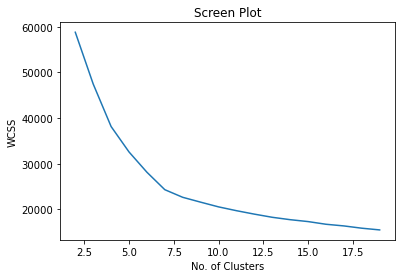

In [32]:
plt.plot(np.arange(2,20),wcss)
plt.title("Screen Plot")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()


In [33]:
model=KMeans(n_clusters=7,random_state=2022)
model.fit(df_scaled)
df_scaled['cluster']=model.predict(df_scaled)



In [34]:
df_scaled

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,cluster
0,0.000167,0.711538,0.020591,2.430469e-06,1.0,0.000000,0.727273,0.020833,0.825495,0.470588,0.065421,0.000084,0.044007,0.000230,0
1,1.000000,0.668016,0.035811,6.674720e-07,0.0,0.941000,0.909091,0.050833,0.720492,0.529412,0.112150,0.000016,0.053961,0.000219,6
2,0.998996,0.540486,0.032982,6.021758e-07,0.0,0.000000,0.454545,0.023167,0.698426,0.529412,0.065421,0.000036,0.065056,0.000371,1
3,0.900602,0.584008,0.037635,1.733976e-06,0.0,0.799000,0.000000,0.033667,0.733443,0.529412,0.084112,0.000043,0.088121,0.000468,6
4,0.998996,0.485830,0.027269,3.406284e-07,0.0,0.689000,0.363636,0.018333,0.571827,0.470588,0.065421,0.000103,0.047263,0.000156,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158789,0.000030,0.472672,0.047898,3.417166e-06,0.0,0.000562,0.454545,0.078333,0.875155,0.529412,0.570093,0.000028,0.070363,0.000114,3
158790,0.345382,0.594130,0.051693,2.408703e-06,0.0,0.000025,0.000000,0.054000,0.804479,0.529412,0.719626,0.000032,0.050176,0.000231,3
158791,0.011245,0.585020,0.041371,2.517530e-06,0.0,0.000000,0.454545,0.017000,0.855830,0.529412,0.710280,0.000035,0.065320,0.000137,3
158792,0.016968,0.564777,0.061350,3.072548e-06,0.0,0.000000,0.909091,0.061500,0.877629,0.470588,0.392523,0.000057,0.064303,0.000319,2


In [35]:
for i in df.columns:
    if i in ['name','year','artists']:
        df_scaled[i]=df[i]


In [36]:
df_scaled

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,cluster,artists,name,year
0,0.000167,0.711538,0.020591,2.430469e-06,1.0,0.000000,0.727273,0.020833,0.825495,0.470588,0.065421,0.000084,0.044007,0.000230,0,OsamaBeenLeanin,Gang Wit Da Shit,1920
1,1.000000,0.668016,0.035811,6.674720e-07,0.0,0.941000,0.909091,0.050833,0.720492,0.529412,0.112150,0.000016,0.053961,0.000219,6,The Southern Serenaders,Alone At Last,1923
2,0.998996,0.540486,0.032982,6.021758e-07,0.0,0.000000,0.454545,0.023167,0.698426,0.529412,0.065421,0.000036,0.065056,0.000371,1,Maurice Chevalier,C'est pas grand chose,1924
3,0.900602,0.584008,0.037635,1.733976e-06,0.0,0.799000,0.000000,0.033667,0.733443,0.529412,0.084112,0.000043,0.088121,0.000468,6,Tommy Dorsey His Clambake Seven Tommy Dorsey,Twilight In Turkey,1925
4,0.998996,0.485830,0.027269,3.406284e-07,0.0,0.689000,0.363636,0.018333,0.571827,0.470588,0.065421,0.000103,0.047263,0.000156,6,Ignacio Corsini,Trago Amargo - Remasterizado,1925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158789,0.000030,0.472672,0.047898,3.417166e-06,0.0,0.000562,0.454545,0.078333,0.875155,0.529412,0.570093,0.000028,0.070363,0.000114,3,Of Mice Men,Bones Exposed,2014
158790,0.345382,0.594130,0.051693,2.408703e-06,0.0,0.000025,0.000000,0.054000,0.804479,0.529412,0.719626,0.000032,0.050176,0.000231,3,RM,seoul (prod. HONNE),2018
158791,0.011245,0.585020,0.041371,2.517530e-06,0.0,0.000000,0.454545,0.017000,0.855830,0.529412,0.710280,0.000035,0.065320,0.000137,3,Avril Lavigne,Head Above Water,2019
158792,0.016968,0.564777,0.061350,3.072548e-06,0.0,0.000000,0.909091,0.061500,0.877629,0.470588,0.392523,0.000057,0.064303,0.000319,2,PKCZ R Hiroomi Tosaka,CHAIN BREAKER,2020


In [37]:
class Song_Recommendation():
    def __init__(self,data):
        self.data=data
    def recommend(self,songs="",no=1):
        equi_d=[]
        try:
            song=self.data[(self.data['name'].str.lower()==songs.lower())].head(1).values[0]
            rc=self.data[(self.data['name'].str.lower() !=songs.lower()) & (self.data['cluster']==song[14])]

            for s in rc.values:
                d=0
                for c in range(len(rc.columns)):
                    if  c not in [14,15,16,17]:
                        d=d+np.square(song[c]-s[c])
                equi_d.append(np.sqrt(d))
            rc['Euclidean_distance']=equi_d
            rc=rc.sort_values('Euclidean_distance')
            col=['artists','name','cluster','Euclidean_distance','year']
            return rc[col][:no]
        except :
            return print('the song not found in the Playlist')
            


In [38]:
spotify=Song_Recommendation(df_scaled)    
spotify.recommend("Keep A Song In Your Soul",10)

C:\Users\Abhi\AppData\Local\Temp\ipykernel_3016\189825158.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['Euclidean_distance']=equi_d


,artists,name,cluster,Euclidean_distance,year
479,Billie Holiday Teddy Wilson,Everybody's Laughing (with Teddy Wilson & His ...,1,0.056737,1933
5524,Billie Holiday,Falling In Love Again - Take 1,1,0.057184,1933
157204,Dock Boggs,Bright Sunny South,1,0.062353,1964
6203,TIN TAN Y MARCELO,Mira Luisa,1,0.063386,1947
43872,Dean Martin Helen O Connell,We Never Talk Much,1,0.065875,1951
142576,Sylvia Rexach Tuti Umpierre,Es Tarde Ya,1,0.066161,1958
14506,Billie Holiday,Says My Heart - Take 1,1,0.071900,1933
137,Robert Johnson,Kind Hearted Woman Blues,1,0.072012,1936
102603,Jeri Southern,If I Had You,1,0.073728,1957
13960,Louis Armstrong His Hot Five,Don't Forget To Mess Around,1,0.074670,1925


In [39]:
spotify.recommend("Flies and Barren Thoughts",10)

C:\Users\Abhi\AppData\Local\Temp\ipykernel_3016\189825158.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['Euclidean_distance']=equi_d


,artists,name,cluster,Euclidean_distance,year
157127,The Raining Blooddrops,Crashing Believes,0,0.041870,2013
111462,The Raining Blooddrops,Unreached,0,0.048361,2013
147248,The Raining Blooddrops,Sleeping Together,0,0.061794,2013
141351,Neophyte Tha Playah,Trasher! - Original Mix,0,0.066319,2012
108496,The Raining Blooddrops,Our World = Down,0,0.067395,2013
80493,Jesse Mader,Break My Fall (J.James Mix 2008),0,0.069025,2017
154765,Full Kareta,A Wonderful New Year,0,0.072147,2014
65643,Jesse Mader,Break My Fall (J.M.D. Mix 2010),0,0.075014,2017
59669,Resting Scary Face,In the Year 2000,0,0.084155,2020
2756,Numba 9,Trash Bags of That Sour,0,0.085540,1927


In [40]:
spotify.recommend("Es Tarde Ya",10)

C:\Users\Abhi\AppData\Local\Temp\ipykernel_3016\189825158.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['Euclidean_distance']=equi_d


,artists,name,cluster,Euclidean_distance,year
5524,Billie Holiday,Falling In Love Again - Take 1,1,0.046102,1933
43872,Dean Martin Helen O Connell,We Never Talk Much,1,0.048219,1951
113978,Sylvia Rexach Tuti Umpierre,Por Siempre,1,0.048849,1958
102603,Jeri Southern,If I Had You,1,0.050526,1957
90655,Thelonious Monk Quintet,Misterioso - Alternate Take,1,0.055438,1956
80609,Lata Mangeshkar C Ramchandra,Kitna Haseen Hain Mausam,1,0.055853,1955
36471,Noor Jehan,Jawan Hain Mohabbat,1,0.059092,1946
479,Billie Holiday Teddy Wilson,Everybody's Laughing (with Teddy Wilson & His ...,1,0.059628,1933
10823,Billie Holiday,Some Other Spring,1,0.061879,1933
157204,Dock Boggs,Bright Sunny South,1,0.064487,1964


In [41]:
spotify.recommend('"Be My Love (From ""The Toast of New Orleans"")"',10)

C:\Users\Abhi\AppData\Local\Temp\ipykernel_3016\189825158.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['Euclidean_distance']=equi_d


,artists,name,cluster,Euclidean_distance,year
84001,Noel Coward Mario Lanza Ray Sinatra,Someday I'll Find You,5,0.055990,1951
23197,,今夕何夕,5,0.064473,1942
42173,Dennis Morgan Spike Jones Orchestra,"Good Night, Good Neighbor",5,0.065199,1943
105495,Giorgos Papasideris Klarino- Nikos Karakostas,O Liakatas,5,0.071874,1930
81737,Giorgos Papasideris,Grigoris Liakatas,5,0.071874,1940
105654,E Moraiti Georgia Mittaki Klarino G Anestopou...,Pia Dolia Mana To Lege,5,0.073988,1930
107339,Richard Rodgers Mario Lanza Ray Sinatra,"""If I Loved You (from """"Carousel"""")""",5,0.074323,1951
90787,,Καταχανίστικος,5,0.076170,1930
135339,M S Subbulakshmi,Hari Tum Haro,5,0.081196,1947
74617,Umberto Giordano Richard Tucker Fausto Cleva,"""Andrea Chénier, Act IV:""""Come un bel dì Maggi...",5,0.084566,1949


In [42]:
spotify.recommend('One day',10)

C:\Users\Abhi\AppData\Local\Temp\ipykernel_3016\189825158.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc['Euclidean_distance']=equi_d


,artists,name,cluster,Euclidean_distance,year
11663,Numba 9,Baking Dough (Money on My Mind),0,0.115182,1927
108572,Fatt Matt,Life Is...,0,0.119085,2005
25376,H nkar H 4 S O,Jüpiter,0,0.124320,1953
76189,Hilnigger AK97 Badman Dan,Man of the Year 2018,0,0.133986,2017
117644,Recusant,Перемены,0,0.135097,2021
31433,,Часть 69.2 - Фиеста,0,0.138539,1926
97010,K-Rino DJ Screw,Why U Wanna Hate?,0,0.139015,2003
65163,MC Shakie,Chekk on It Bounce,0,0.145928,2018
45269,K-Rino,You Ain't Real,0,0.149851,2003
95694,J Neri South West Royals Gunsta ProVocalz,The Anthem.,0,0.151683,2018


In [43]:
spotify.recommend()

the song not found in the Playlist
